# K-nearest Neighbour (KNN)
KNN is a supervised machine learning algorithm that can be used to solve both classification and regression problems.

It is a non-parametric, lazy learning algorithm. Non-parametric means that it does not make any assumptions on the underlying data distribution. Lazy learning means that it does not require any training data points for model generation. All training data is used in the testing phase. This makes training faster and testing phase slower and costlier.

If you have any questions or need further explanation on K-nearest Neighbour (KNN), feel free to ask!

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml library
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
from  sklearn.neighbors import KNeighborsClassifier


In [56]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
X = df.drop("species", axis=1)
Y = df["species"]

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [60]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X, Y)

# new_data = np.array([[0.2, 0.5, 0.5, 5]])
# knn.predict(new_data)

In [61]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


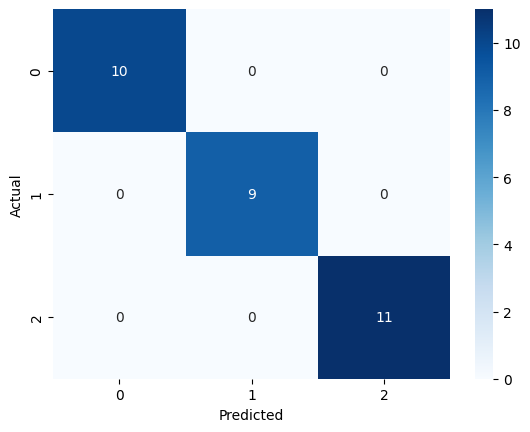

In [62]:
Y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# KNN using Regressor



In [64]:
tips = sns.load_dataset('tips')
tips.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [70]:
X = tips.drop("tip", axis=1)
Y = tips["tip"]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   sex         244 non-null    category
 2   smoker      244 non-null    category
 3   day         244 non-null    category
 4   time        244 non-null    category
 5   size        244 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 5.5 KB


In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == "object" or X[col].dtype == "category":
        X[col] = le.fit_transform(X[col])


print(X.head(10))
print(X.info())

   total_bill  sex  smoker  day  time  size
0       16.99    0       0    2     0     2
1       10.34    1       0    2     0     3
2       21.01    1       0    2     0     3
3       23.68    1       0    2     0     2
4       24.59    0       0    2     0     4
5       25.29    1       0    2     0     4
6        8.77    1       0    2     0     2
7       26.88    1       0    2     0     4
8       15.04    1       0    2     0     2
9       14.78    1       0    2     0     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    int64  
 2   smoker      244 non-null    int64  
 3   day         244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 11.6 KB
None


In [74]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

model = KNeighborsRegressor(n_neighbors=5, metric="minkowski", p=2)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# evalute the model

print(f"mean_squared_error {mean_squared_error(Y_test,Y_pred)}")
print(f"r2_score {r2_score(Y_test,Y_pred)}")
print(f"Root Mean Squared Error {np.sqrt(mean_squared_error(Y_test,Y_pred))}")

mean_squared_error 0.8382265306122448
r2_score 0.3294034029001649
Root Mean Squared Error 0.9155471209130881


In [76]:
model.predict([[35, 0, 1, 0, 1, 1]])


c:\Users\hp\anaconda3\envs\python_ml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3.54])